use_log.csv -> 센터 이용 이력  
customer_master.csv -> 회원 데이터 (탈퇴한 회원 포함)  
class_master.csv -> 회원 구분  
campaign_master.csv -> 가입 시 행사 종류

In [4]:
import pandas as pd

uselog = pd.read_csv("use_log.csv")
customer = pd.read_csv("customer_master.csv")
customerclass = pd.read_csv("class_master.csv")
campaign = pd.read_csv("campaign_master.csv")

In [5]:
customer.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [6]:
customerclass.head()

,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500
2,C03,2_야간,6000


In [7]:
campaign.head()

,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인
2,CA3,1_입회비무료


## preprocessing

In [8]:
customer_join = pd.merge(customer, customerclass, on='class', how='left')
customer_join = pd.merge(customer_join, campaign, on='campaign_id', how='left')
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반


In [9]:
customer_join.isnull().sum() # 탈퇴하지 않은 회원 end_date 공백

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

In [10]:
customer_join.groupby("class_name").count()['customer_id']

class_name
0_종일    2045
1_주간    1019
2_야간    1128
Name: customer_id, dtype: int64

In [11]:
customer_join.groupby("campaign_name").count()['customer_id']

campaign_name
0_입회비반액할인     650
1_입회비무료       492
2_일반         3050
Name: customer_id, dtype: int64

In [12]:
customer_join.groupby("gender").count()['customer_id']

gender
F    1983
M    2209
Name: customer_id, dtype: int64

In [13]:
customer_join.groupby("is_deleted").count()['customer_id']

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

In [14]:
customer_join['start_date'] = pd.to_datetime(customer_join['start_date'])

In [15]:
# 가장 최근 월(2019년 3월)의 고객 데이터 추출
customer_join['end_date'] = pd.to_datetime(customer_join['end_date'])
customer_newer = customer_join.loc[(customer_join['end_date'] >= pd.to_datetime("20190331")) | (customer_join["end_date"].isna())]

In [16]:
print(len(customer_newer))

2953


In [17]:
customer_newer['end_date'].unique()

array([                          'NaT', '2019-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [18]:
customer_newer.groupby("class_name").count()["customer_id"]

class_name
0_종일    1444
1_주간     696
2_야간     813
Name: customer_id, dtype: int64

In [19]:
customer_newer.groupby("campaign_name").count()["customer_id"]

campaign_name
0_입회비반액할인     311
1_입회비무료       242
2_일반         2400
Name: customer_id, dtype: int64

In [20]:
customer_newer.groupby("gender").count()["customer_id"]

gender
F    1400
M    1553
Name: customer_id, dtype: int64

In [21]:
# 월 이용 횟수 집계
uselog['usedate'] = pd.to_datetime(uselog['usedate'])
uselog['연월'] = uselog['usedate'].dt.strftime("%Y%m")
uselog_months = uselog.groupby(['연월', 'customer_id'], as_index=False).count()

In [22]:
uselog

,log_id,customer_id,usedate,연월
0,L00000049012330,AS009373,2018-04-01,201804
1,L00000049012331,AS015315,2018-04-01,201804
2,L00000049012332,AS040841,2018-04-01,201804
3,L00000049012333,AS046594,2018-04-01,201804
4,L00000049012334,AS073285,2018-04-01,201804
...,...,...,...,...
197423,L00000049209753,TS977703,2019-03-31,201903
197424,L00000049209754,TS979550,2019-03-31,201903
197425,L00000049209755,TS995299,2019-03-31,201903
197426,L00000049209756,TS995853,2019-03-31,201903


In [23]:
uselog_months

,연월,customer_id,log_id,usedate
0,201804,AS002855,4,4
1,201804,AS009013,2,2
2,201804,AS009373,3,3
3,201804,AS015315,6,6
4,201804,AS015739,7,7
...,...,...,...,...
36837,201903,TS995853,8,8
36838,201903,TS998593,8,8
36839,201903,TS999079,3,3
36840,201903,TS999231,6,6


In [24]:
uselog_months.rename(columns={"log_id":"count"}, inplace=True)
del uselog_months['usedate']

In [25]:
uselog_customer = uselog_months.groupby("customer_id").agg(['mean','median', 'max', 'min'])["count"]

In [26]:
uselog_customer.head()

,mean,median,max,min
customer_id,,,,
AS002855,4.500000,5.0,7,2
AS008805,4.000000,4.0,8,1
AS009013,2.000000,2.0,2,2
AS009373,5.083333,5.0,7,3
AS015233,7.545455,7.0,11,4


In [27]:
# 정기 이용 고객 추출
# 매주 같은 요일에 왔는지
uselog['weekday'] = uselog['usedate'].dt.weekday
uselog_weekday = uselog.groupby(['customer_id', '연월', 'weekday'], 
                                as_index = False).count()[['customer_id', '연월', 'weekday', 'log_id']]

In [28]:
uselog_weekday
# AS002855 회원은 4월에도 토요일에 4번, 5월에도 토요일에 4번 왔으므로 매주 토요일에 오는 회원

,customer_id,연월,weekday,log_id
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1
...,...,...,...,...
93328,TS999855,201901,1,1
93329,TS999855,201901,5,4
93330,TS999855,201901,6,1
93331,TS999855,201902,5,4


In [29]:
uselog_weekday.rename(columns={'log_id':'count'}, inplace=True)

In [30]:
uselog_weekday = uselog_weekday.groupby("customer_id", as_index=False).max()[['customer_id', 'count']]
uselog_weekday # count 4, 5인 사람은 적어도 어떤 달의 매주 특정 요일에 정기적으로 방문한 고객

,customer_id,count
0,AS002855,5
1,AS008805,4
2,AS009013,2
3,AS009373,5
4,AS015233,5
...,...,...
4187,TS995853,5
4188,TS998593,5
4189,TS999079,5
4190,TS999231,5


In [31]:
uselog_weekday['routine_flg'] = 0
uselog_weekday['routine_flg'] = uselog_weekday['routine_flg'].where(uselog_weekday['count']<4,1)

In [32]:
customer_join = pd.merge(customer_join, uselog_customer, on='customer_id', how='left')
customer_join = pd.merge(customer_join, uselog_weekday[['customer_id', 'routine_flg']], on='customer_id', how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1


In [33]:
# 회원기간 계산
# 탈퇴하지 않은 회원은 end_date를 2019년 4월 30일로 채워서 계산
from dateutil.relativedelta import relativedelta # 날짜 비교 함수

customer_join['calc_date'] = customer_join['end_date']
customer_join['calc_date'] = customer_join['calc_date'].fillna(pd.to_datetime("20190430"))
customer_join['membership_period'] = 0
for i in range(len(customer_join)):
    delta = relativedelta(customer_join['calc_date'].iloc[i], customer_join['start_date'].iloc[i])
    customer_join['membership_period'].iloc[i] = delta.years*12 + delta.months

C:\Users\ooroo\AppData\Local\Temp/ipykernel_31052/2427103638.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_join['membership_period'].iloc[i] = delta.years*12 + delta.months


In [34]:
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47


In [35]:
# 고객 행동의 각종 통계량 파악
customer_join[['mean','median','max','min']].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


In [36]:
customer_join.groupby("routine_flg").count()['customer_id']
# 정기적으로 이용하는 회원의 수가 많다.

routine_flg
0     779
1    3413
Name: customer_id, dtype: int64

(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <BarContainer object of 10 artists>)

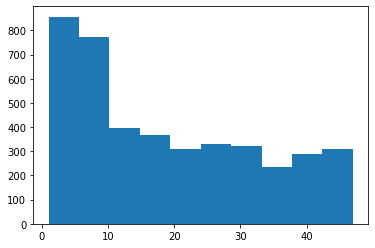

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(customer_join['membership_period'])
# 회원기간이 10개월 이내인 고객이 많고, 10개월 이상의 고객 수는 거의 일정
# 짧은 기간에 고객이 빠져나가는 업계

## 탈퇴회원과 지속회원의 차이

In [38]:
customer_end = customer_join.loc[customer_join['is_deleted']==1]
customer_end.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,8.026667
std,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,5.033692
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,4.000000
50%,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,7.000000
75%,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,11.000000
max,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,23.000000


In [39]:
customer_stay = customer_join.loc[customer_join['is_deleted']==0]
customer_stay.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,23.970443
std,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,13.746761
min,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,1.000000
25%,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,12.000000
50%,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,24.000000
75%,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,35.000000
max,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000


In [41]:
customer_join.to_csv("customer_join.csv", index=False)

## 군집화로 회원 그룹화

In [42]:
uselog = pd.read_csv('use_log.csv')
uselog.isnull().sum()
customer = pd.read_csv('customer_join.csv')
customer.isnull().sum()

customer_id             0
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
dtype: int64

In [43]:
customer_clustering = customer[['mean', 'median', 'max', 'min', 'membership_period']]
customer_clustering.head()

,mean,median,max,min,membership_period
0,4.833333,5.0,8,2,47
1,5.083333,5.0,7,3,47
2,4.583333,5.0,6,3,47
3,4.833333,4.5,7,2,47
4,3.916667,4.0,6,1,47


## 표준화 후 4개의 군집으로 K-means Clustering

In [44]:
# mean, median, max, min은 1~8 사이의 값이지만 membership_period는 최댓값이 47으로 표준화 필요

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
customer_clustering_sc = sc.fit_transform(customer_clustering)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit(customer_clustering_sc)
customer_clustering['cluster'] = clusters.labels_
print(customer_clustering['cluster'].unique())
customer_clustering.head()

[3 2 1 0]


C:\Users\ooroo\AppData\Local\Temp/ipykernel_31052/189740056.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_clustering['cluster'] = clusters.labels_


,mean,median,max,min,membership_period,cluster
0,4.833333,5.0,8,2,47,3
1,5.083333,5.0,7,3,47,3
2,4.583333,5.0,6,3,47,3
3,4.833333,4.5,7,2,47,3
4,3.916667,4.0,6,1,47,3


In [45]:
customer_clustering.columns = ['월평균값', '월중앙값', '월최댓값', '월최솟값', '회원기간', 'cluster']
customer_clustering.groupby('cluster').count()

,월평균값,월중앙값,월최댓값,월최솟값,회원기간
cluster,,,,,
0,846,846,846,846,846
1,1334,1334,1334,1334,1334
2,763,763,763,763,763
3,1249,1249,1249,1249,1249


In [46]:
customer_clustering.groupby('cluster').mean()

,월평균값,월중앙값,월최댓값,월최솟값,회원기간
cluster,,,,,
0,8.054608,8.039598,10.009456,6.160757,7.072104
1,5.524239,5.375187,8.745877,2.687406,14.843328
2,3.054713,2.888598,4.756225,1.653997,9.263434
3,4.677494,4.671337,7.232986,2.153723,36.915933


In [47]:
# 클러스터링 시각화를 위해 차원 축소
from sklearn.decomposition import PCA

X = customer_clustering_sc
pca = PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = customer_clustering['cluster']

In [48]:
pca_df

,0,1,cluster
0,-0.819982,-1.959097,3
1,-0.707922,-1.799857,3
2,-1.061499,-1.659826,3
3,-1.160764,-1.810139,3
4,-2.017132,-1.670101,3
...,...,...,...
4187,3.027933,1.139635,0
4188,5.064720,0.769684,0
4189,3.027933,1.139635,0
4190,6.083114,0.584708,0


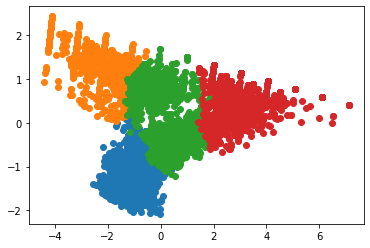

In [49]:
for i in customer_clustering['cluster'].unique():
    tmp = pca_df.loc[pca_df['cluster']==i]
    plt.scatter(tmp[0], tmp[1])

In [50]:
customer_clustering

,월평균값,월중앙값,월최댓값,월최솟값,회원기간,cluster
0,4.833333,5.0,8,2,47,3
1,5.083333,5.0,7,3,47,3
2,4.583333,5.0,6,3,47,3
3,4.833333,4.5,7,2,47,3
4,3.916667,4.0,6,1,47,3
...,...,...,...,...,...,...
4187,8.000000,8.0,8,8,1,0
4188,10.000000,10.0,10,10,1,0
4189,8.000000,8.0,8,8,1,0
4190,11.000000,11.0,11,11,1,0


In [51]:
# 탈퇴회원을 특정하기 위해 is_deleted열을 customer_clustering에 추가해서 cluster 및 is_deleted로 집계
# customer_clustering과 customer은 index로 연결되어 있기 때문에 concat으로 결합 가능
customer_clustering = pd.concat([customer_clustering, customer], axis=1)
customer_clustering.groupby(['cluster', 'is_deleted'], as_index=False).count()[['cluster', 'is_deleted', 'customer_id']]

,cluster,is_deleted,customer_id
0,0,0,827
1,0,1,19
2,1,0,785
3,1,1,549
4,2,1,763
5,3,0,1230
6,3,1,19


In [53]:
# 정기적/비정기적 이용 여부
customer_clustering.groupby(["cluster", "routine_flg"], as_index=False).count()[["cluster", "routine_flg", "customer_id"]]

,cluster,routine_flg,customer_id
0,0,0,52
1,0,1,794
2,1,0,228
3,1,1,1106
4,2,0,497
5,2,1,266
6,3,0,2
7,3,1,1247


## 다음달 이용 횟수 예측 모델
과거 6개월의 이용데이터를 사용해 다음 달의 이용 횟수 예측

In [54]:
uselog["usedate"] = pd.to_datetime(uselog['usedate'])
uselog['연월'] = uselog['usedate'].dt.strftime('%Y%m')
uselog_months = uselog.groupby(['연월', 'customer_id'], as_index=False).count()
uselog_months.rename(columns={'log_id':"count"}, inplace=True)
del uselog_months['usedate']
uselog_months.head()

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [55]:
# 이번 달부터 과거 5개월분의 이용 횟수와 다음 달의 이용 횟수 저장
year_months = list(uselog_months['연월'].unique())
predict_data = pd.DataFrame()
for i in range(6, len(year_months)):
    tmp = uselog_months.loc[uselog_months['연월']==year_months[i]]
    tmp.rename(columns={'count':'count_pred'}, inplace=True) # count_pred -> 예측하고 싶은 달의 데이터
    for j in range(1, 7):
        tmp_before = uselog_months.loc[uselog_months["연월"]==year_months[i-j]]
        del tmp_before['연월']
        tmp_before.rename(columns={'count':"count_{}".format(j-1)}, inplace=True)
        tmp = pd.merge(tmp, tmp_before, on='customer_id', how="left")
    predict_data = pd.concat([predict_data, tmp], ignore_index=True)
predict_data.head()

C:\Users\ooroo\AppData\Local\Temp/ipykernel_31052/625231421.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.rename(columns={'count':'count_pred'}, inplace=True) # count_pred -> 예측하고 싶은 달의 데이터
C:\Users\ooroo\AppData\Local\Temp/ipykernel_31052/625231421.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_before.rename(columns={'count':"count_{}".format(j-1)}, inplace=True)
C:\Users\ooroo\AppData\Local\Temp/ipykernel_31052/625231421.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
1,201810,AS008805,2,2.0,5.0,7.0,8.0,NaN,NaN
2,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
3,201810,AS015233,7,9.0,11.0,5.0,7.0,7.0,NaN
4,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0


In [56]:
# 아직 가입기간이 짧아서 count_4, count_5에 결측치 있는 경우도 있음
predict_data = predict_data.dropna()
predict_data = predict_data.reset_index(drop=True)
predict_data.head()

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0


In [57]:
# 회원기간 변수 추가

predict_data = pd.merge(predict_data, customer[['customer_id', 'start_date']], on = 'customer_id', how='left')
predict_data['now_date'] = pd.to_datetime(predict_data['연월'], format='%Y%m')
predict_data['start_date'] = pd.to_datetime(predict_data['start_date'])

predict_data['period'] = None
for i in range(len(predict_data)):
    delta = relativedelta(predict_data['now_date'][i], predict_data['start_date'][i])
    predict_data['period'][i] = delta.years*12 + delta.months

predict_data.head()

C:\Users\ooroo\AppData\Local\Temp/ipykernel_31052/2161728475.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data['period'][i] = delta.years*12 + delta.months


,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date,now_date,period
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01,2018-10-01,23
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01,2018-10-01,35
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01,2018-10-01,39
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01,2018-10-01,16
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01,2018-10-01,12


In [58]:
from sklearn import linear_model
import sklearn.model_selection

predict_data = predict_data.loc[predict_data['start_date']>=pd.to_datetime('20180401')]

model = linear_model.LinearRegression()
X = predict_data[['count_0', 'count_1', 'count_2', 'count_3', 'count_4', 'count_5', 'period']]
y = predict_data['count_pred']
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y)
model.fit(X_train, y_train)

LinearRegression()

In [59]:
# 변수 기여도
coef = pd.DataFrame({'feature_names':X.columns, 'coefficient':model.coef_})
coef

,feature_names,coefficient
0,count_0,0.331596
1,count_1,0.190467
2,count_2,0.183574
3,count_3,0.192955
4,count_4,0.043734
5,count_5,0.075812
6,period,0.048972


In [60]:
# 예측하기

x1 = [3, 4, 4, 6, 8, 7, 8]
x2 = [2, 2, 3, 3, 4, 6, 8]
x_pred = [x1, x2]
x_pred

[[3, 4, 4, 6, 8, 7, 8], [2, 2, 3, 3, 4, 6, 8]]

In [61]:
model.predict(x_pred)

array([3.68873238, 1.96301439])

In [62]:
uselog_months.to_csv('use_log_months.csv', index=False)

# 회원탈퇴 예측 모델

In [66]:
customer = pd.read_csv('customer_join.csv')
uselog_months = pd.read_csv('use_log_months.csv')

### 어떤 특정 회원이 그만두기 전월의 상태를 나타내는 데이터

In [67]:
# 이 달과 1개월 전의 이용횟수를 집계한 데이터 활용
year_months = list(uselog_months["연월"].unique())
uselog = pd.DataFrame()
for i in range(1, len(year_months)):
    tmp = uselog_months.loc[uselog_months["연월"]==year_months[i]]
    tmp.rename(columns={'count':'count_0'}, inplace=True)
    tmp_before = uselog_months.loc[uselog_months["연월"]==year_months[i-1]]
    del tmp_before["연월"]
    tmp_before.rename(columns={'count':'count_1'}, inplace=True)
    tmp = pd.merge(tmp, tmp_before, on="customer_id", how="left")
    uselog = pd.concat([uselog, tmp], ignore_index=True)

uselog.head()

C:\Users\ooroo\AppData\Local\Temp/ipykernel_31052/2974017334.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.rename(columns={'count':'count_0'}, inplace=True)
C:\Users\ooroo\AppData\Local\Temp/ipykernel_31052/2974017334.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_before.rename(columns={'count':'count_1'}, inplace=True)
C:\Users\ooroo\AppData\Local\Temp/ipykernel_31052/2974017334.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

,연월,customer_id,count_0,count_1
0,201805,AS002855,5,4.0
1,201805,AS009373,4,3.0
2,201805,AS015233,7,NaN
3,201805,AS015315,3,6.0
4,201805,AS015739,5,7.0


In [68]:
# 이 스포츠센터에서는 월말까지 탈퇴 신청을 해야 다음 달 말에 탈퇴할 수 있으므로
# 8월에 탈퇴 신청을 한다면 7월의 데이터를 활용해야 탈퇴를 미리 방지할 수 있다.
from dateutil.relativedelta import relativedelta

exit_customer = customer.loc[customer['is_deleted']==1]
exit_customer['exit_date'] = None
exit_customer['end_date'] = pd.to_datetime(exit_customer['end_date'])
for i in range(len(exit_customer)):
    exit_customer['exit_date'].iloc[i] = exit_customer['end_date'].iloc[i] - relativedelta(months=1)
exit_customer["연월"] = pd.to_datetime(exit_customer["exit_date"]).dt.strftime("%Y%m")
uselog['연월'] = uselog['연월'].astype(str)
exit_uselog = pd.merge(uselog, exit_customer, on=["customer_id", "연월"], how='left')
exit_uselog.head()

C:\Users\ooroo\AppData\Local\Temp/ipykernel_31052/1332956279.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exit_customer['exit_date'] = None
C:\Users\ooroo\AppData\Local\Temp/ipykernel_31052/1332956279.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exit_customer['end_date'] = pd.to_datetime(exit_customer['end_date'])
C:\Users\ooroo\AppData\Local\Temp/ipykernel_31052/1332956279.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
0,201805,AS002855,5,4.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201805,AS009373,4,3.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201805,AS015233,7,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201805,AS015315,3,6.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201805,AS015739,5,7.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
exit_uselog = exit_uselog.dropna(subset=['name'])
exit_uselog.head()

,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
19,201805,AS055680,3,3.0,XXXXX,C01,M,2018-03-01,2018-06-30,CA1,...,10500.0,2_일반,3.000000,3.0,3.0,3.0,0.0,2018-06-30,3.0,2018-05-30 00:00:00
57,201805,AS169823,2,3.0,XX,C01,M,2017-11-01,2018-06-30,CA1,...,10500.0,2_일반,3.000000,3.0,4.0,2.0,1.0,2018-06-30,7.0,2018-05-30 00:00:00
110,201805,AS305860,5,3.0,XXXX,C01,M,2017-06-01,2018-06-30,CA1,...,10500.0,2_일반,3.333333,3.0,5.0,2.0,0.0,2018-06-30,12.0,2018-05-30 00:00:00
128,201805,AS363699,5,3.0,XXXXX,C01,M,2018-02-01,2018-06-30,CA1,...,10500.0,2_일반,3.333333,3.0,5.0,2.0,0.0,2018-06-30,4.0,2018-05-30 00:00:00
147,201805,AS417696,1,4.0,XX,C03,F,2017-09-01,2018-06-30,CA1,...,6000.0,2_일반,2.000000,1.0,4.0,1.0,0.0,2018-06-30,9.0,2018-05-30 00:00:00


### 지속회원 데이터
지속회원 데이터는 탈퇴 월이 없기 대문에 2018년 5월이든 2018년 12월이든 아무거나 사용할 수 있다.  
탈퇴회원 데이터와 지속회원 데이터 수가 불균형하기 때문에 지속회원 데이터도 회원당 1개가 되게 중복 제거.

In [71]:
conti_customer = customer.loc[customer['is_deleted']==0]
conti_uselog = pd.merge(uselog, conti_customer, on=['customer_id'], how='left')
conti_uselog = conti_uselog.dropna(subset=['name'])

In [72]:
conti_uselog = conti_uselog.sample(frac=1).reset_index(drop=True) # 데이터 섞기
conti_uselog = conti_uselog.drop_duplicates(subset='customer_id') # 중복 제거
conti_uselog.head()

,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,201810,HD453390,4,5.0,XXXX,C03,M,2015-07-01,NaN,CA1,...,2_야간,6000.0,2_일반,4.000000,4.0,7.0,2.0,1.0,2019-04-30,45.0
1,201812,HI866614,7,8.0,XXXXX,C02,M,2018-05-01,NaN,CA2,...,1_주간,7500.0,0_입회비반액할인,8.000000,8.0,11.0,6.0,1.0,2019-04-30,11.0
2,201901,IK999272,2,3.0,XXXX,C01,M,2015-06-01,NaN,CA1,...,0_종일,10500.0,2_일반,3.916667,4.0,5.0,2.0,1.0,2019-04-30,46.0
3,201805,AS454149,3,4.0,XXX,C01,F,2017-02-01,NaN,CA1,...,0_종일,10500.0,2_일반,4.083333,4.0,7.0,2.0,1.0,2019-04-30,26.0
4,201811,IK791659,4,6.0,XX,C01,M,2016-07-01,NaN,CA2,...,0_종일,10500.0,0_입회비반액할인,5.000000,5.0,8.0,3.0,1.0,2019-04-30,33.0


In [86]:
predict_data = pd.concat([conti_uselog, exit_uselog], ignore_index=True)
predict_data.head()

,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
0,201810,HD453390,4,5.0,XXXX,C03,M,2015-07-01,NaT,CA1,...,6000.0,2_일반,4.000000,4.0,7.0,2.0,1.0,2019-04-30,45.0,NaN
1,201812,HI866614,7,8.0,XXXXX,C02,M,2018-05-01,NaT,CA2,...,7500.0,0_입회비반액할인,8.000000,8.0,11.0,6.0,1.0,2019-04-30,11.0,NaN
2,201901,IK999272,2,3.0,XXXX,C01,M,2015-06-01,NaT,CA1,...,10500.0,2_일반,3.916667,4.0,5.0,2.0,1.0,2019-04-30,46.0,NaN
3,201805,AS454149,3,4.0,XXX,C01,F,2017-02-01,NaT,CA1,...,10500.0,2_일반,4.083333,4.0,7.0,2.0,1.0,2019-04-30,26.0,NaN
4,201811,IK791659,4,6.0,XX,C01,M,2016-07-01,NaT,CA2,...,10500.0,0_입회비반액할인,5.000000,5.0,8.0,3.0,1.0,2019-04-30,33.0,NaN


### 예측할 달의 재적기간 변수 추가

In [87]:
predict_data["period"] = 0
predict_data["now_date"] = pd.to_datetime(predict_data['연월'], format='%Y%m')
predict_data['start_date'] = pd.to_datetime(predict_data['start_date'])
for i in range(len(predict_data)):
    delta = relativedelta(predict_data['now_date'][i], predict_data['start_date'][i])
    predict_data['period'][i] = int(delta.years*12 + delta.months)
predict_data.head()

C:\Users\ooroo\AppData\Local\Temp/ipykernel_31052/1178380144.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data['period'][i] = int(delta.years*12 + delta.months)


,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date,period,now_date
0,201810,HD453390,4,5.0,XXXX,C03,M,2015-07-01,NaT,CA1,...,4.000000,4.0,7.0,2.0,1.0,2019-04-30,45.0,NaN,39,2018-10-01
1,201812,HI866614,7,8.0,XXXXX,C02,M,2018-05-01,NaT,CA2,...,8.000000,8.0,11.0,6.0,1.0,2019-04-30,11.0,NaN,7,2018-12-01
2,201901,IK999272,2,3.0,XXXX,C01,M,2015-06-01,NaT,CA1,...,3.916667,4.0,5.0,2.0,1.0,2019-04-30,46.0,NaN,43,2019-01-01
3,201805,AS454149,3,4.0,XXX,C01,F,2017-02-01,NaT,CA1,...,4.083333,4.0,7.0,2.0,1.0,2019-04-30,26.0,NaN,15,2018-05-01
4,201811,IK791659,4,6.0,XX,C01,M,2016-07-01,NaT,CA2,...,5.000000,5.0,8.0,3.0,1.0,2019-04-30,33.0,NaN,28,2018-11-01


### 결측치 제거
end_date와 exit_date는 탈퇴 고객만 있으며 유지회원은 결측치

In [88]:
predict_data.isna().sum()

연월                      0
customer_id             0
count_0                 0
count_1               261
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
exit_date            2842
period                  0
now_date                0
dtype: int64

In [89]:
predict_data = predict_data.dropna(subset=['count_1'])

### 문자열 변수를 더미 변수로
설명변수 -> count_1(1개월 전의 이용 횟수), campain_name, class_name, gender, routine_flg(정기이용 여부), period(재적 기간)  
목적 변수 -> is_deleted(탈퇴 여부)

In [90]:
col = ['campaign_name', 'class_name', 'gender', 'count_1', 'routine_flg', 'period', 'is_deleted']
predict_data = predict_data[col]
predict_data = pd.get_dummies(predict_data)
predict_data.head()

,count_1,routine_flg,period,is_deleted,campaign_name_0_입회비반액할인,campaign_name_1_입회비무료,campaign_name_2_일반,class_name_0_종일,class_name_1_주간,class_name_2_야간,gender_F,gender_M
0,5.0,1.0,39,0.0,0,0,1,0,0,1,0,1
1,8.0,1.0,7,0.0,1,0,0,0,1,0,0,1
2,3.0,1.0,43,0.0,0,0,1,1,0,0,0,1
3,4.0,1.0,15,0.0,0,0,1,1,0,0,1,0
4,6.0,1.0,28,0.0,1,0,0,1,0,0,0,1


In [91]:
# gender_F가 1이면 여성, 0이면 남성이므로 gender_M은 필요 없다.
# class_name_종일과 class_name_주간이 모두 0이면 class_name_야간이 1이므로 class_name_야간도 필요 없다

del predict_data['gender_M']
del predict_data['class_name_2_야간']
del predict_data['campaign_name_2_일반'] # 마찬가지

## 의사결정트리를 사용해서 탈퇴 예측 모델 구축

In [92]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.model_selection

exit = predict_data.loc[predict_data['is_deleted']==1]
conti = predict_data.loc[predict_data['is_deleted']==0].sample(len(exit)) # 데이터 개수 맞추기

X = pd.concat([exit, conti], ignore_index=True)
y = X['is_deleted']
del X['is_deleted']
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y)

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print(y_test_pred) # 1은 탈퇴, 0은 유지

[0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1.
 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1.
 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.

In [94]:
results = pd.DataFrame({'y_test':y_test, 'y_pred':y_test_pred})
results

,y_test,y_pred
718,1.0,0.0
1264,0.0,0.0
1735,0.0,0.0
116,1.0,1.0
1349,0.0,0.0
...,...,...
871,1.0,1.0
938,1.0,0.0
330,1.0,0.0
1622,0.0,0.0


In [95]:
correct = len(results.loc[results['y_test']==results['y_pred']])
data_count = len(results)
score = correct / data_count
score

0.8878326996197718

In [96]:
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

0.8878326996197718
0.9809885931558935


### 변수 기여도

In [97]:
importance = pd.DataFrame({'feature_names':X.columns, 'coefficient':model.feature_importances_})
importance

,feature_names,coefficient
0,count_1,0.315401
1,routine_flg,0.112260
2,period,0.497990
3,campaign_name_0_입회비반액할인,0.012964
4,campaign_name_1_입회비무료,0.012095
5,class_name_0_종일,0.022073
6,class_name_1_주간,0.013978
7,gender_F,0.013240


### 예측하기

In [105]:
count_1 = 3
routine_flg = 1
period = 10
campaign_name ='입회비무료'
class_name = '종일'
gender = 'M'

In [106]:
if campaign_name == '입회비반값할인':
    campaign_name_list = [1, 0]
elif campaign_name == '입회비무료':
    campaign_name_list = [0, 1]
elif campaign_name == '일반':
    campaign_name_list = [0, 0]

if class_name == '종일':
    class_name_list = [1, 0]
elif class_name == '주간':
    class_name_list = [0, 1]
elif class_name == '야간':
    class_name_list = [0, 0]

if gender == 'F':
    gender_list = [1]
elif gender == 'M':
    gender_list = [0]
    
input_data = [count_1, routine_flg, period]
input_data.extend(campaign_name_list)
input_data.extend(class_name_list)
input_data.extend(gender_list)    

In [107]:
print(model.predict([input_data]))
print(model.predict_proba([input_data]))

[1.]
[[0. 1.]]
